

---
# Indonesia Tourism Recommendation

---




# ***Recomendation Model Analysis***

---



Import Library

---
mengimport library yang digunakan untuk pembuatan sistem rekomendasi


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Membaca dan Melihat Dataset

---
membaca dataset dan menampilkan sample data yang berupa 5 data teratas dari dataset

In [2]:
file_path = "/content/tourism_with_id.csv"
df = pd.read_csv(file_path)

df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Mengecek Jumlah data pada dataset

---
Mengecek jumlah data dan diketahui terdapat 437 baris data & 13 kolom data


In [3]:
df.shape

(437, 13)

Mengecek Kolom yang pada Dataset

---
Terdapat 13 kolom dengan nama : 'Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'


In [4]:
df.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

Mengecek Tipe Data pada Dataset

---
mengecek tipe data pada setiap fitur pada dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Mengecek Duplikasi data

---

Setelah melakukan pengecekan dapat diketahui bahwa tidak ada duplikasi data

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Duplicated Data: {duplicate_count}")

Duplicated Data: 0


Mengecek Nilai Kosong pada Dataset

---

terdapat 232 nilai kosong pada kolom Time_Minutes & 437 nilai kosong pada unamed: 11

In [7]:
print(df.isnull().sum())

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


Mengecek Distribusi Waktu Kunjungan

---

Mengecek distribusi waktu kunjungan awal

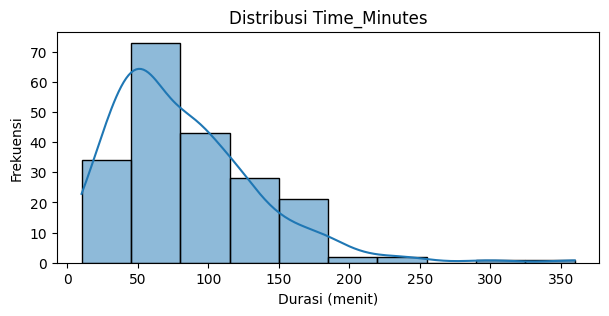

In [8]:
plt.figure(figsize=(7,3))
sns.histplot(df["Time_Minutes"].dropna(), bins=10, kde=True)
plt.title("Distribusi Time_Minutes")
plt.xlabel("Durasi (menit)")
plt.ylabel("Frekuensi")
plt.show()

Pengolahan Data

---

Unnamed: 11 berisi nilai kosong
Unnamed: 12 hanya berisi nomor indeks
Coordinate tidak diperlukan karena sudah ada Lat & Long

1. Menghilangkan kolom unnamed:11, unnamed:12, dan Coordinate
- Unnamed: 11 berisi nilai kosong
- Unnamed: 12 hanya berisi nomor indeks
- Coordinate tidak diperlukan karena sudah ada Lat & Long
2. Mengisi Nilai waktu kunjungan (Time_Minutes) menggunakan median per category dan yang tidak terisi akan diisi dengan median keseluruhan
3. Mengubah variabel category dan variabel city menjadi variabel numerik

4. Mengecek kembali nilai kosong di setiap kolom



In [9]:
# Data preprocessing
df = df.drop(columns=["Unnamed: 11", "Unnamed: 12", "Coordinate"])
df["Time_Minutes"] = df.groupby("Category")["Time_Minutes"].transform(lambda x: x.fillna(x.median()))
df.update(df["Time_Minutes"].fillna(df["Time_Minutes"].median()))

df_encoded = pd.get_dummies(df, columns=["Category", "City"], drop_first=True)

print(df.isnull().sum())

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Lat             0
Long            0
dtype: int64


Mengecek Distribusi Waktu Kunjungan

---
Mengecek Distribusi Waktu Kunjungan setelah Imputasi


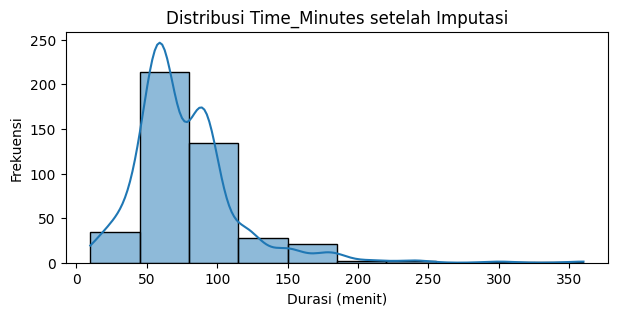

In [10]:
plt.figure(figsize=(7,3))
sns.histplot(df["Time_Minutes"].dropna(), bins=10, kde=True)
plt.title("Distribusi Time_Minutes setelah Imputasi")
plt.xlabel("Durasi (menit)")
plt.ylabel("Frekuensi")
plt.show()

Feature-Target Separation & Train-Test Split

---


1. Menghapus kolom "Place_Id", "Place_Name", "Description", dan "Rating" karena tidak berguna sebagai fitur dalam prediksi dan Kolom "Rating" dipilih sebagai target yang akan diprediksi oleh model

  - X berisi semua fitur kecuali kolom-kolom yang tidak relevan.

  - y berisi nilai rating yang akan diprediksi.

2. Data dibagi menjadi 80% training & 20% testing

In [11]:
# Split features and target
X = df_encoded.drop(columns=["Place_Id", "Place_Name", "Description", "Rating"])
y = df_encoded["Rating"]

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

---


- Melakukan Standard Scaling pada fitur agar memiliki distribusi dengan mean = 0 dan standar deviasi = 1, sehingga model bekerja lebih optimal.

- mengonversi hasil StandardScaler yang berbentuk array, menjadi DataFrame Pandas dengan nama kolom yang sama



In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to df
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

Data Distribution Analysis

---
Megecek distribusi kategori wisata, distribusi wisata per kota, distribusi rating wisata, dan distribusi harga wisata


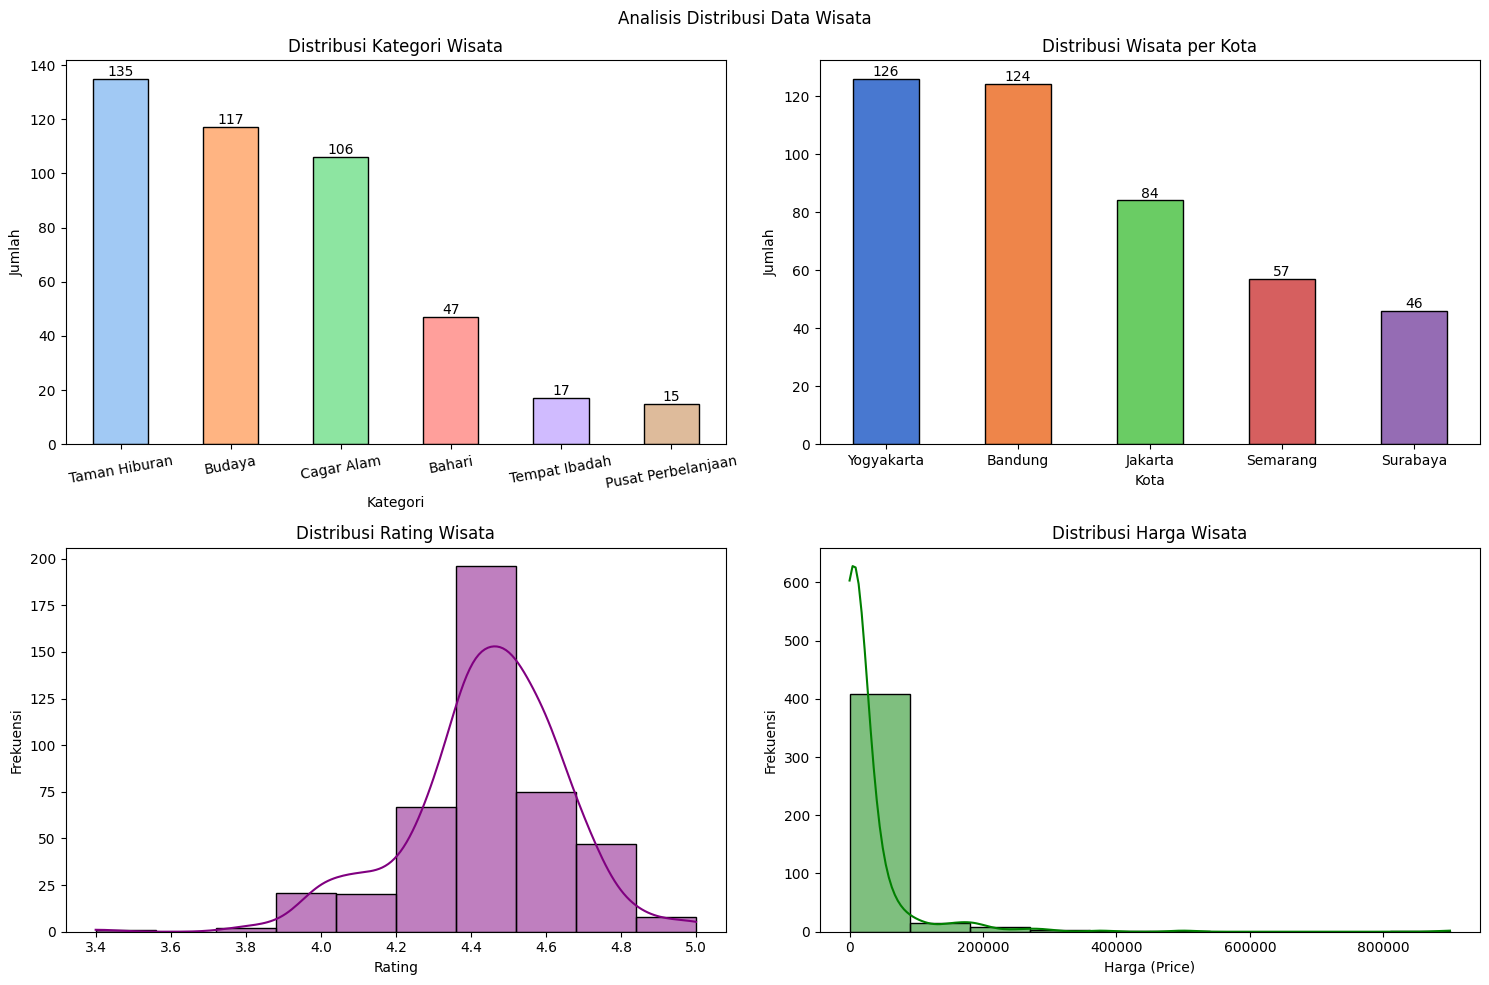

In [13]:
# Figure Layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("Analisis Distribusi Data Wisata")

# Category
df["Category"].value_counts().plot(kind="bar", color=sns.color_palette("pastel"), edgecolor="black", ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Kategori Wisata")
axes[0, 0].set_xlabel("Kategori")
axes[0, 0].set_ylabel("Jumlah")
axes[0, 0].tick_params(axis="x", rotation=10)

for p in axes[0, 0].patches:
    axes[0, 0].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

# City
df["City"].value_counts().plot(kind="bar", color=sns.color_palette("muted"), edgecolor="black", ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Wisata per Kota")
axes[0, 1].set_xlabel("Kota")
axes[0, 1].set_ylabel("Jumlah")
axes[0, 1].tick_params(axis="x", rotation=0)

for p in axes[0, 1].patches:
    axes[0, 1].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                         textcoords='offset points')

# Rating
sns.histplot(df["Rating"], bins=10, kde=True, color="purple", ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Rating Wisata")
axes[1, 0].set_xlabel("Rating")
axes[1, 0].set_ylabel("Frekuensi")

# Price
sns.histplot(df["Price"], bins=10, kde=True, color="green", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Harga Wisata")
axes[1, 1].set_xlabel("Harga (Price)")
axes[1, 1].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

Initialize models & Train models and make predictions

---
melakukan inisiasi model yang digunakan untuk training. Model yang digunakan adalah linear regression, random forest, XGBoost, KNN, dan SVR.
setelah training, melakukan prediksi untuk mencari 5 hasil prediksi pertama setiap model



In [14]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5, metric='euclidean'),
    "SVR": SVR()
}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

for name, pred in predictions.items():
   print(f"{name} Predictions: {pred[:5]}")

Linear Regression Predictions: [4.5022585  4.42844966 4.67412808 4.40544793 4.37981542]
Random Forest Predictions: [4.461 4.481 4.753 4.456 4.469]
XGBoost Predictions: [4.4596276 4.344308  4.7490706 4.387136  4.5476294]
KNN Predictions: [4.58 4.46 4.8  4.56 4.3 ]
SVR Predictions: [4.55638272 4.48300499 4.80011046 4.57106528 4.40958851]


Evaluation Result

---
- SVR menunjukkan model terbaik dengan MAE sebesar 0.1286, MSE sebesar 0.0293, RMSE sebesar 0.1710, dan MAPE sebesar 2.9704%, yang menunjukkan bahwa model ini memiliki tingkat kesalahan prediksi yang paling rendah dibandingkan model lainnya.
- Random Forest juga menunjukkan performa yang baik dengan MAE sebesar 0.1304, MSE sebesar 0.0288, RMSE sebesar 0.1697, dan MAPE sebesar 3.0006%. Meskipun sedikit tertinggal dari SVR, Random Forest masih menjadi salah satu model yang kompetitif dalam memberikan prediksi yang akurat.

In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate models
performance = {}
for name, y_pred in predictions.items():
    performance[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE (%)": mean_absolute_percentage_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

performance_df = pd.DataFrame(performance).T
print(performance_df)

                        MAE       MSE      RMSE  MAPE (%)  R² Score
Linear Regression  0.132545  0.028663  0.169301  3.050197  0.300570
Random Forest      0.130409  0.028793  0.169684  3.000633  0.297396
XGBoost            0.146651  0.035537  0.188511  3.364958  0.132835
KNN                0.134773  0.032268  0.179633  3.111091  0.212589
SVR                0.128636  0.029252  0.171031  2.970400  0.286198


Evaluation Result Precision@5

---


Linear Regression dan Random Forest memiliki nilai tertinggi, yaitu 0.8, yang berarti 80% dari 5 prediksi teratas yang dihasilkan oleh model tersebut sesuai dengan nilai sebenarnya.

In [16]:
def precision_at_k(y_true, y_pred, k=5):
    top_k_indices = np.argsort(y_pred)[-k:]
    relevant_items = np.argsort(y_true)[-k:]
    precision = len(set(top_k_indices) & set(relevant_items)) / k
    return precision

# Compute Precision@5 for each model
precision_scores = {name: precision_at_k(y_test, y_pred, k=5) for name, y_pred in predictions.items()}
precision_df = pd.DataFrame.from_dict(precision_scores, orient="index", columns=["Precision@5"])
print(precision_df)

                   Precision@5
Linear Regression          0.8
Random Forest              0.8
XGBoost                    0.6
KNN                        0.6
SVR                        0.6


Conclusion

---
Random Forest merupakan model terbaik secara keseluruhan karena memiliki keseimbangan antara kesalahan prediksi yang rendah dan akurasi pemilihan rekomendasi yang lebih tinggi.
Meskipun SVR memiliki kesalahan prediksi yang sedikit lebih rendah, Random Forest tetap unggul karena memiliki Precision@5 lebih tinggi yang penting dalam sistem rekomendasi.

---



# ***Recomendation System***

Recomendation System Top 10 Tourist Destination

---



In [17]:
# Recommendation System
def recommend_places(model, X_test, df_original, top_k=10):
    y_pred = model.predict(X_test)
    df_recommend = df_original.iloc[X_test.index].copy()
    df_recommend["Predicted_Score"] = y_pred
    recommendations = df_recommend.sort_values(by="Predicted_Score", ascending=False).head(top_k)
    return recommendations[["Place_Name", "Category", "City", "Rating", "Predicted_Score"]]

#Recomendation Model
top_recommendations = recommend_places(models["Random Forest"], X_test, df)

# Top 10 Recomendation Place
from IPython.display import display
display(top_recommendations)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Place_Name,Category,City,Rating,Predicted_Score
154,Pantai Ngobaran,Bahari,Yogyakarta,4.6,4.528
155,Pantai Pulang Sawal,Bahari,Yogyakarta,4.5,4.528
157,Pantai Pok Tunggal,Bahari,Yogyakarta,4.5,4.528
181,Hutan Mangrove Kulon Progo,Bahari,Yogyakarta,4.1,4.528
153,Pantai Ngrawe (Mesra),Bahari,Yogyakarta,4.5,4.528
165,Kebun Teh Nglinggo,Cagar Alam,Yogyakarta,4.5,4.523
131,Air Terjun Kedung Pedut,Cagar Alam,Yogyakarta,4.5,4.523
55,Pantai Ancol,Bahari,Jakarta,4.4,4.521
9,Pulau Tidung,Bahari,Jakarta,4.5,4.521
342,Pantai Baruna,Bahari,Semarang,4.0,4.519


City & Category List

---



In [18]:
# City List
def list_cities():
    cities = df["City"].unique()
    print("City List:")
    for city in cities:
        print("-", city)

# Category List
def list_categories():
    categories = df["Category"].unique()
    print("Category List:")
    for category in categories:
        print("-", category)

In [19]:
from tabulate import tabulate

def list_city_category(df):
    unique_cities = pd.DataFrame({"City": df["City"].unique()})
    unique_categories = pd.DataFrame({"Category": df["Category"].unique()})

    # Merge the two DataFrames
    merged_table = pd.concat([unique_cities, unique_categories], axis=1).fillna("")

    # Print the table with columns aligned to the center
    print(tabulate(merged_table, headers="keys", tablefmt="fancy_grid", showindex=False, colalign=["center", "center"]))

# Menampilkan daftar kota dan kategori
list_city_category(df)


╒════════════╤════════════════════╕
│    City    │      Category      │
╞════════════╪════════════════════╡
│  Jakarta   │       Budaya       │
├────────────┼────────────────────┤
│ Yogyakarta │   Taman Hiburan    │
├────────────┼────────────────────┤
│  Bandung   │     Cagar Alam     │
├────────────┼────────────────────┤
│  Semarang  │       Bahari       │
├────────────┼────────────────────┤
│  Surabaya  │ Pusat Perbelanjaan │
├────────────┼────────────────────┤
│            │   Tempat Ibadah    │
╘════════════╧════════════════════╛


Recomendation System Top 10 City and Category

---



In [20]:
# Recommendation System with City and Category Filter
def recommend_places(model, X_test, df_original, top_k=10, city_filter=None, category_filter=None):
    y_pred = model.predict(X_test)
    df_recommend = df_original.iloc[X_test.index].copy()
    df_recommend["Predicted_Score"] = y_pred

    # Apply filters
    if city_filter:
        df_recommend = df_recommend[df_recommend["City"].isin(city_filter)]
    if category_filter:
        df_recommend = df_recommend[df_recommend["Category"].isin(category_filter)]

    recommendations = df_recommend.sort_values(by="Predicted_Score", ascending=False).head(top_k)
    return recommendations[["Place_Name", "Category", "City", "Rating", "Predicted_Score"]]

# Function to display city recommendations
def display_city_recommendations(city_name):
    city_recommendations = recommend_places(models["Random Forest"], X_test, df, top_k=10, city_filter=[city_name])
    print(city_recommendations)

# Function to display category recommendations
def display_category_recommendations(category_name):
    category_recommendations = recommend_places(models["Random Forest"], X_test, df, top_k=10, category_filter=[category_name])
    print(category_recommendations)

# Recomendation System Top 10 Based on City

---



City List

---



In [21]:
list_cities()

City List:
- Jakarta
- Yogyakarta
- Bandung
- Semarang
- Surabaya


# Jakarta

In [22]:
display_city_recommendations("Jakarta")

                         Place_Name       Category     City  Rating  \
55                     Pantai Ancol         Bahari  Jakarta     4.4   
9                      Pulau Tidung         Bahari  Jakarta     4.5   
66           Margasatwa Muara Angke     Cagar Alam  Jakarta     4.2   
70  Cibubur Garden Diary (Cibugary)     Cagar Alam  Jakarta     4.5   
30       Wisata Alam Mangrove Angke     Cagar Alam  Jakarta     4.3   
42                  The Escape Hunt  Taman Hiburan  Jakarta     4.4   
82               Alive Museum Ancol  Taman Hiburan  Jakarta     4.3   
77             Hutan Kota Srengseng  Taman Hiburan  Jakarta     4.3   
75                   Taman Cattleya  Taman Hiburan  Jakarta     4.5   
17            Museum Bank Indonesia         Budaya  Jakarta     4.7   

    Predicted_Score  
55            4.521  
9             4.521  
66            4.518  
70            4.518  
30            4.518  
42            4.510  
82            4.510  
77            4.510  
75            4.510 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Yogyakarta


In [23]:
display_city_recommendations("Yogyakarta")

                     Place_Name       Category        City  Rating  \
155         Pantai Pulang Sawal         Bahari  Yogyakarta     4.5   
181  Hutan Mangrove Kulon Progo         Bahari  Yogyakarta     4.1   
157          Pantai Pok Tunggal         Bahari  Yogyakarta     4.5   
154             Pantai Ngobaran         Bahari  Yogyakarta     4.6   
153       Pantai Ngrawe (Mesra)         Bahari  Yogyakarta     4.5   
131     Air Terjun Kedung Pedut     Cagar Alam  Yogyakarta     4.5   
165          Kebun Teh Nglinggo     Cagar Alam  Yogyakarta     4.5   
132  Puncak Kebun Buah Mangunan  Taman Hiburan  Yogyakarta     4.6   
126           Blue Lagoon Jogja  Taman Hiburan  Yogyakarta     4.3   
93               Sumur Gumuling  Taman Hiburan  Yogyakarta     4.5   

     Predicted_Score  
155            4.528  
181            4.528  
157            4.528  
154            4.528  
153            4.528  
131            4.523  
165            4.523  
132            4.517  
126            4.517  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Bandung

In [24]:
display_city_recommendations("Bandung")

                         Place_Name       Category     City  Rating  \
245           Curug Tilu Leuwi Opat     Cagar Alam  Bandung     4.4   
325      Taman Kupu-Kupu Cihanjuang     Cagar Alam  Bandung     4.0   
218                  Tebing Karaton     Cagar Alam  Bandung     4.5   
307      Pemandian Air Panas Ciater     Cagar Alam  Bandung     4.3   
304             Sunrise Point Cukul     Cagar Alam  Bandung     4.6   
234                     Gua Belanda     Cagar Alam  Bandung     4.4   
305               Sungai Palayangan     Cagar Alam  Bandung     4.6   
311  Taman Hutan Raya Ir. H. Juanda     Cagar Alam  Bandung     4.5   
290        Water Park Bandung Indah  Taman Hiburan  Bandung     4.0   
225                 Kawasan Punclut  Taman Hiburan  Bandung     4.4   

     Predicted_Score  
245            4.516  
325            4.516  
218            4.516  
307            4.516  
304            4.516  
234            4.516  
305            4.516  
311            4.516  
290        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Semarang

In [25]:
display_city_recommendations("Semarang")

                          Place_Name       Category      City  Rating  \
342                    Pantai Baruna         Bahari  Semarang     4.0   
387              Watu Gunung Ungaran     Cagar Alam  Semarang     4.4   
340  Hutan Wisata Tinjomoyo Semarang     Cagar Alam  Semarang     4.3   
370              Wisata Eling Bening     Cagar Alam  Semarang     4.3   
360     Wisata Kampung Krisan Clapar  Taman Hiburan  Semarang     4.1   
369                   Benteng Pendem         Budaya  Semarang     4.2   
375               Semarang Chinatown         Budaya  Semarang     4.5   
347                  Pura Giri Natha         Budaya  Semarang     4.7   
382                    Taman Tabanas  Taman Hiburan  Semarang     4.4   
384    Kampung Batik Gedong Semarang         Budaya  Semarang     4.4   

     Predicted_Score  
342            4.519  
387            4.516  
340            4.516  
370            4.516  
360            4.508  
369            4.502  
375            4.502  
347         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Surabaya

In [26]:
display_city_recommendations("Surabaya")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


                                Place_Name       Category      City  Rating  \
423                    Pantai Ria Kenjeran         Bahari  Surabaya     4.2   
404                    Surabaya North Quay  Taman Hiburan  Surabaya     4.4   
424            Waterpark Kenjeran Surabaya  Taman Hiburan  Surabaya     4.1   
395                    Monumen Kapal Selam         Budaya  Surabaya     4.4   
432                    Museum Mpu Tantular         Budaya  Surabaya     4.4   
417  Museum Sepuluh Nopember Kota Surabaya         Budaya  Surabaya     4.7   
411               Masjid Nasional Al-Akbar  Tempat Ibadah  Surabaya     4.9   
410              Masjid Muhammad Cheng Hoo  Tempat Ibadah  Surabaya     4.7   
402                       Taman Barunawati  Taman Hiburan  Surabaya     4.2   
394                         Taman Prestasi  Taman Hiburan  Surabaya     4.6   

     Predicted_Score  
423            4.519  
404            4.508  
424            4.508  
395            4.502  
432            

# Recomendation System Top 10 Based on Category


Category List

---



In [27]:
list_categories()

Category List:
- Budaya
- Taman Hiburan
- Cagar Alam
- Bahari
- Pusat Perbelanjaan
- Tempat Ibadah


# Budaya

In [28]:
display_category_recommendations("Budaya")

                                Place_Name Category      City  Rating  \
395                    Monumen Kapal Selam   Budaya  Surabaya     4.4   
375                     Semarang Chinatown   Budaya  Semarang     4.5   
417  Museum Sepuluh Nopember Kota Surabaya   Budaya  Surabaya     4.7   
220                 Museum Geologi Bandung   Budaya   Bandung     4.6   
19                   Museum Taman Prasasti   Budaya   Jakarta     4.5   
0                         Monumen Nasional   Budaya   Jakarta     4.6   
347                        Pura Giri Natha   Budaya  Semarang     4.7   
289             Museum Pendidikan Nasional   Budaya   Bandung     4.6   
72                         Museum Perangko   Budaya   Jakarta     4.4   
17                   Museum Bank Indonesia   Budaya   Jakarta     4.7   

     Predicted_Score  
395            4.502  
375            4.502  
417            4.502  
220            4.502  
19             4.502  
0              4.502  
347            4.502  
289         

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Taman Hiburan

In [29]:
display_category_recommendations("Taman Hiburan")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


                                       Place_Name       Category        City  \
137                               Jogja Exotarium  Taman Hiburan  Yogyakarta   
116  The World Landmarks - Merapi Park Yogyakarta  Taman Hiburan  Yogyakarta   
126                             Blue Lagoon Jogja  Taman Hiburan  Yogyakarta   
113                         The Lost World Castle  Taman Hiburan  Yogyakarta   
132                    Puncak Kebun Buah Mangunan  Taman Hiburan  Yogyakarta   
93                                 Sumur Gumuling  Taman Hiburan  Yogyakarta   
75                                 Taman Cattleya  Taman Hiburan     Jakarta   
77                           Hutan Kota Srengseng  Taman Hiburan     Jakarta   
82                             Alive Museum Ancol  Taman Hiburan     Jakarta   
42                                The Escape Hunt  Taman Hiburan     Jakarta   

     Rating  Predicted_Score  
137     4.4            4.517  
116     4.2            4.517  
126     4.3            4.5

# Cagar Alam

In [30]:
display_category_recommendations("Cagar Alam")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


                          Place_Name    Category        City  Rating  \
131          Air Terjun Kedung Pedut  Cagar Alam  Yogyakarta     4.5   
165               Kebun Teh Nglinggo  Cagar Alam  Yogyakarta     4.5   
66            Margasatwa Muara Angke  Cagar Alam     Jakarta     4.2   
30        Wisata Alam Mangrove Angke  Cagar Alam     Jakarta     4.3   
70   Cibubur Garden Diary (Cibugary)  Cagar Alam     Jakarta     4.5   
340  Hutan Wisata Tinjomoyo Semarang  Cagar Alam    Semarang     4.3   
245            Curug Tilu Leuwi Opat  Cagar Alam     Bandung     4.4   
304              Sunrise Point Cukul  Cagar Alam     Bandung     4.6   
311   Taman Hutan Raya Ir. H. Juanda  Cagar Alam     Bandung     4.5   
370              Wisata Eling Bening  Cagar Alam    Semarang     4.3   

     Predicted_Score  
131            4.523  
165            4.523  
66             4.518  
30             4.518  
70             4.518  
340            4.516  
245            4.516  
304            4.516  


# Bahari

In [31]:
display_category_recommendations("Bahari")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


                     Place_Name Category        City  Rating  Predicted_Score
155         Pantai Pulang Sawal   Bahari  Yogyakarta     4.5            4.528
153       Pantai Ngrawe (Mesra)   Bahari  Yogyakarta     4.5            4.528
181  Hutan Mangrove Kulon Progo   Bahari  Yogyakarta     4.1            4.528
154             Pantai Ngobaran   Bahari  Yogyakarta     4.6            4.528
157          Pantai Pok Tunggal   Bahari  Yogyakarta     4.5            4.528
9                  Pulau Tidung   Bahari     Jakarta     4.5            4.521
55                 Pantai Ancol   Bahari     Jakarta     4.4            4.521
423         Pantai Ria Kenjeran   Bahari    Surabaya     4.2            4.519
342               Pantai Baruna   Bahari    Semarang     4.0            4.519


# Pusat Perbelanjaan

In [32]:
display_category_recommendations("Pusat Perbelanjaan")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


             Place_Name            Category     City  Rating  Predicted_Score
79      Plaza Indonesia  Pusat Perbelanjaan  Jakarta     4.7            4.478
33   Pasar Taman Puring  Pusat Perbelanjaan  Jakarta     4.4            4.478
283          Pasar Baru  Pusat Perbelanjaan  Bandung     4.3            4.478
25       Pecinan Glodok  Pusat Perbelanjaan  Jakarta     4.3            4.478
24    Pasar Tanah Abang  Pusat Perbelanjaan  Jakarta     4.0            4.478


# Tempat Ibadah

In [33]:
display_category_recommendations("Tempat Ibadah")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


                            Place_Name       Category      City  Rating  \
278  Masjid Agung Trans Studio Bandung  Tempat Ibadah   Bandung     4.8   
411           Masjid Nasional Al-Akbar  Tempat Ibadah  Surabaya     4.9   
302                  Masjid Al-Imtizaj  Tempat Ibadah   Bandung     4.7   
287                  Masjid Salman ITB  Tempat Ibadah   Bandung     4.8   
410          Masjid Muhammad Cheng Hoo  Tempat Ibadah  Surabaya     4.7   
22                     Gereja Katedral  Tempat Ibadah   Jakarta     4.8   

     Predicted_Score  
278            4.478  
411            4.478  
302            4.478  
287            4.478  
410            4.478  
22             4.478  
